In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

pd.set_option("display.max.columns", None)
pd.set_option('precision',2)

%matplotlib inline

In [32]:
df = pd.read_csv('../datasets/creditcard.csv')

In [90]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Viewing and Exploring Data

In [33]:
print(f'(rows,columns) = {df.shape}')
df.head()

(rows,columns) = (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-1.83e-02,2.78e-01,-0.11,0.07,0.13,-0.19,1.34e-01,-0.02,149.62,0
1,0.0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-2.26e-01,-6.39e-01,0.10,-0.34,0.17,0.13,-8.98e-03,0.01,2.69,0
2,1.0,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,2.48e-01,7.72e-01,0.91,-0.69,-0.33,-0.14,-5.54e-02,-0.06,378.66,0
3,1.0,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-1.08e-01,5.27e-03,-0.19,-1.18,0.65,-0.22,6.27e-02,0.06,123.50,0
4,2.0,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-9.43e-03,7.98e-01,-0.14,0.14,-0.21,0.50,2.19e-01,0.22,69.99,0


In [34]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.88,10.07,-9.83,-2.07,-5.36,-2.61,-4.92,7.31,1.91,4.36,-1.59,2.71,-0.69,4.63,-0.92,1.11,1.99,0.51,-0.68,1.48e+00,0.21,0.11,1.01,-5.09e-01,1.44,0.25,9.44e-01,0.82,0.77,0
284803,172787.0,-0.73,-0.06,2.04,-0.74,0.87,1.06,0.02,0.29,0.58,-0.98,-0.15,0.92,1.21,-0.68,1.16,-0.71,-0.03,-1.22,-1.55,5.96e-02,0.21,0.92,0.01,-1.02e+00,-0.61,-0.40,6.85e-02,-0.05,24.79,0
284804,172788.0,1.92,-0.30,-3.25,-0.56,2.63,3.03,-0.30,0.71,0.43,-0.48,0.41,0.06,-0.18,-0.51,1.33,0.14,0.31,0.40,-0.58,1.40e-03,0.23,0.58,-0.04,6.40e-01,0.27,-0.09,4.45e-03,-0.03,67.88,0
284805,172788.0,-0.24,0.53,0.70,0.69,-0.38,0.62,-0.69,0.68,0.39,-0.40,-1.93,-0.96,-1.04,0.45,1.96,-0.61,0.51,1.11,2.90,1.27e-01,0.27,0.80,-0.16,1.23e-01,-0.57,0.55,1.09e-01,0.10,10.00,0
284806,172792.0,-0.53,-0.19,0.70,-0.51,-0.01,-0.65,1.58,-0.41,0.49,-0.92,-1.04,-0.03,-0.19,-0.08,0.04,-0.30,-0.66,0.17,-0.26,3.83e-01,0.26,0.64,0.38,8.80e-03,-0.47,-0.82,-2.42e-03,0.01,217.00,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,284807.00,2.85e+05
mean,94813.86,1.17e-15,3.42e-16,-1.37e-15,2.09e-15,9.60e-16,1.49e-15,-5.56e-16,1.18e-16,-2.41e-15,2.24e-15,1.67e-15,-1.25e-15,8.18e-16,1.21e-15,4.91e-15,1.44e-15,-3.80e-16,9.57e-16,1.04e-15,6.41e-16,1.66e-16,-3.44e-16,2.58e-16,4.47e-15,5.34e-16,1.69e-15,-3.67e-16,-1.22e-16,88.35,1.73e-03
std,47488.15,1.96e+00,1.65e+00,1.52e+00,1.42e+00,1.38e+00,1.33e+00,1.24e+00,1.19e+00,1.10e+00,1.09e+00,1.02e+00,9.99e-01,9.95e-01,9.59e-01,9.15e-01,8.76e-01,8.49e-01,8.38e-01,8.14e-01,7.71e-01,7.35e-01,7.26e-01,6.24e-01,6.06e-01,5.21e-01,4.82e-01,4.04e-01,3.30e-01,250.12,4.15e-02
min,0.00,-5.64e+01,-7.27e+01,-4.83e+01,-5.68e+00,-1.14e+02,-2.62e+01,-4.36e+01,-7.32e+01,-1.34e+01,-2.46e+01,-4.80e+00,-1.87e+01,-5.79e+00,-1.92e+01,-4.50e+00,-1.41e+01,-2.52e+01,-9.50e+00,-7.21e+00,-5.45e+01,-3.48e+01,-1.09e+01,-4.48e+01,-2.84e+00,-1.03e+01,-2.60e+00,-2.26e+01,-1.54e+01,0.00,0.00e+00
25%,54201.50,-9.20e-01,-5.99e-01,-8.90e-01,-8.49e-01,-6.92e-01,-7.68e-01,-5.54e-01,-2.09e-01,-6.43e-01,-5.35e-01,-7.62e-01,-4.06e-01,-6.49e-01,-4.26e-01,-5.83e-01,-4.68e-01,-4.84e-01,-4.99e-01,-4.56e-01,-2.12e-01,-2.28e-01,-5.42e-01,-1.62e-01,-3.55e-01,-3.17e-01,-3.27e-01,-7.08e-02,-5.30e-02,5.60,0.00e+00
50%,84692.00,1.81e-02,6.55e-02,1.80e-01,-1.98e-02,-5.43e-02,-2.74e-01,4.01e-02,2.24e-02,-5.14e-02,-9.29e-02,-3.28e-02,1.40e-01,-1.36e-02,5.06e-02,4.81e-02,6.64e-02,-6.57e-02,-3.64e-03,3.73e-03,-6.25e-02,-2.95e-02,6.78e-03,-1.12e-02,4.10e-02,1.66e-02,-5.21e-02,1.34e-03,1.12e-02,22.00,0.00e+00
75%,139320.50,1.32e+00,8.04e-01,1.03e+00,7.43e-01,6.12e-01,3.99e-01,5.70e-01,3.27e-01,5.97e-01,4.54e-01,7.40e-01,6.18e-01,6.63e-01,4.93e-01,6.49e-01,5.23e-01,4.00e-01,5.01e-01,4.59e-01,1.33e-01,1.86e-01,5.29e-01,1.48e-01,4.40e-01,3.51e-01,2.41e-01,9.10e-02,7.83e-02,77.16,0.00e+00
max,172792.00,2.45e+00,2.21e+01,9.38e+00,1.69e+01,3.48e+01,7.33e+01,1.21e+02,2.00e+01,1.56e+01,2.37e+01,1.20e+01,7.85e+00,7.13e+00,1.05e+01,8.88e+00,1.73e+01,9.25e+00,5.04e+00,5.59e+00,3.94e+01,2.72e+01,1.05e+01,2.25e+01,4.58e+00,7.52e+00,3.52e+00,3.16e+01,3.38e+01,25691.16,1.00e+00


0.17% were fraudulant.
99.83% were legitimate.


0    284315
1       492
Name: Class, dtype: int64

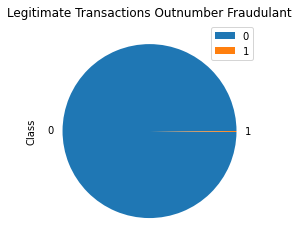

In [37]:
counts = df.Class.value_counts()
legitimate = counts[0]
fraud = counts[1]
total = legitimate+fraud
def percentage(part, whole):
  return 100 * float(part)/float(whole)
print(f"{np.round(percentage(fraud,total),2)}% were fraudulant.")
print(f"{np.round(percentage(legitimate,total),2)}% were legitimate.")
df.Class.value_counts().plot(kind='pie', title='Legitimate Transactions Outnumber Fraudulant', legend=True)
df.Class.value_counts()

In [38]:
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.00,284807.00
mean,94813.86,88.35
std,47488.15,250.12
min,0.00,0.00
25%,54201.50,5.60
50%,84692.00,22.00
75%,139320.50,77.16
max,172792.00,25691.16


In [50]:
def convert(n): 
    return str(datetime.timedelta(seconds = n)) 
df['Age'] = df['Time'].apply(convert)
print(f'{df.Age.describe()}')

count              284807
unique             124592
top       1 day, 21:19:12
freq                   36
Name: Age, dtype: object


In [53]:
print('The last transaction recorded.')
df[df['Age']==df['Age'].max()]

The last transaction recorded.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Age
30595,35999.0,1.09,0.12,0.8,1.2,-0.64,-0.52,-0.16,0.04,-0.08,0.2,1.43,0.77,-0.43,0.51,0.43,0.52,-0.7,0.39,-0.26,-0.09,1.28e-03,-0.11,0.02,0.51,0.33,-0.51,0.02,0.03,36.0,0,9:59:59


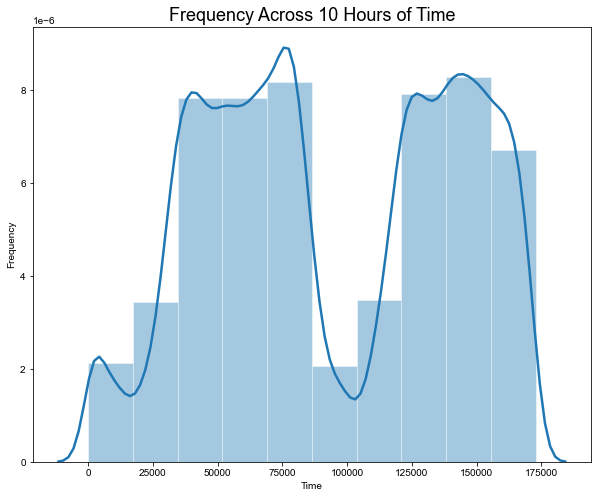

In [54]:
#visualizations of time and amount
f, ax = plt.subplots(figsize=(10,8))
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth":2.5})
t = sns.distplot(df.Time, bins=10)

ax.set(xlabel='Time', ylabel='Frequency')
plt.title('Frequency Across 10 Hours of Time')
plt.show(t)

In [55]:
df.Amount.describe()

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: float64

In [56]:
print(f"Total number of Transactions: ${df['Amount'].count().round(2)} Dollars")

print(f"Total sales: ${df.Amount.sum().round(2)} Dollars")
print(f"Average transaction amount: ${np.mean(df['Amount']).round(2)} Dollars")


Total number of Transactions: $284807 Dollars
Total sales: $25162590.01 Dollars
Average transaction amount: $88.35 Dollars


Text(0.5, 1.0, 'Correlation of Features')

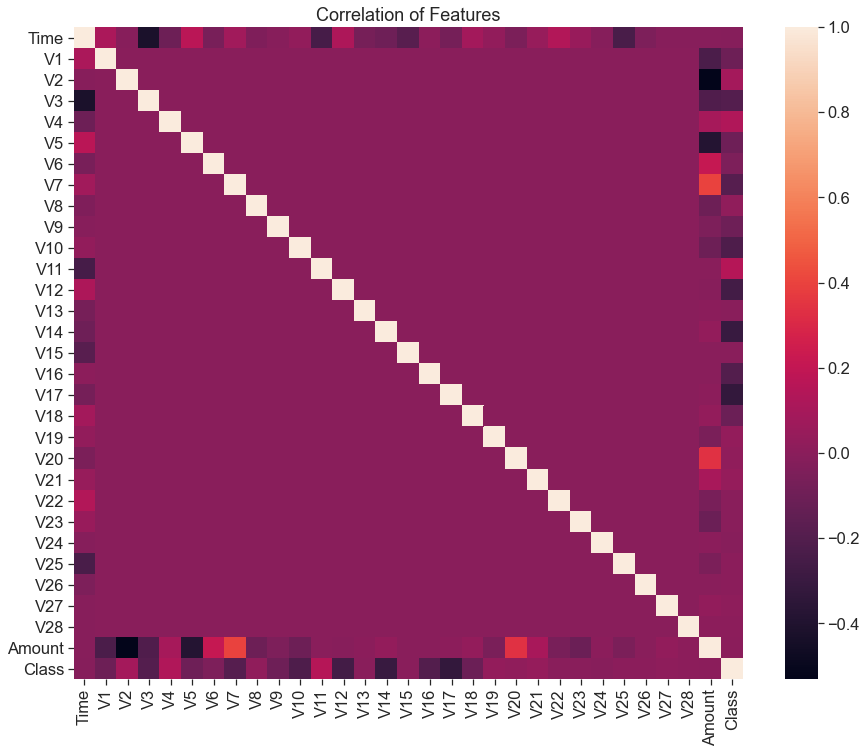

In [60]:
#heatmap
correlation = df.corr()
plt.figure(figsize=(15,12))
heat = sns.heatmap(data=correlation)
plt.title('Correlation of Features')

In [61]:
#skewness
skewness= df.skew()
skewness

Time      -0.04
V1        -3.28
V2        -4.62
V3        -2.24
V4         0.68
V5        -2.43
V6         1.83
V7         2.55
V8        -8.52
V9         0.55
V10        1.19
V11        0.36
V12       -2.28
V13        0.07
V14       -2.00
V15       -0.31
V16       -1.10
V17       -3.84
V18       -0.26
V19        0.11
V20       -2.04
V21        3.59
V22       -0.21
V23       -5.88
V24       -0.55
V25       -0.42
V26        0.58
V27       -1.17
V28       11.19
Amount    16.98
Class     24.00
dtype: float64

# Scaling Amount and Time



In [62]:
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
time_scaled = scaler.fit_transform(df[['Time']])
fl1 = [item for sublist in time_scaled.tolist() for item in sublist]
time_scaled = pd.Series(fl1)

#scaling the amount column
amount_scaled = scaler2.fit_transform(df[['Amount']])
fl2 = [item for sublist in amount_scaled.tolist() for item in sublist]
amount_scaled = pd.Series(fl2)

#concatenating newly created columns w original df
df = pd.concat([df, amount_scaled.rename('amount_scaled'), time_scaled.rename('time_scaled')], axis=1)
df.sample(5)

#dropping old amount and time columns
df.drop(['Amount', 'Time', 'Age'], axis=1, inplace=True)

# Splitting Data into Train and Test



In [64]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
#sanity check
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)


Train Shape: (256424, 31)
Test Shape: (28383, 31)


# Creating Balanced Subsample

In [65]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 441 fraudulent transactions in the train data.


In [66]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [67]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
88969,1.24,0.15,0.38,0.43,-0.32,-0.50,-0.09,-4.72e-04,-0.09,0.12,1.08,0.60,-0.36,0.55,4.26e-01,0.62,-0.76,0.14,0.30,-0.11,-0.24,-7.45e-01,0.09,-1.98e-02,0.21,0.10,-0.04,3.97e-03,0,-0.35,-0.59
150285,-0.60,1.22,1.30,0.26,1.09,-0.44,1.71,-3.94e-01,-1.42,-0.23,1.30,0.97,0.84,0.35,-2.86e-01,-0.32,-0.71,-0.03,0.32,0.16,-0.08,-1.29e-01,-0.39,7.29e-04,0.75,-0.66,-0.13,-1.70e-01,0,-0.22,0.50
32411,-1.50,-1.22,1.83,-0.18,1.02,0.54,-0.74,5.10e-01,0.35,-0.62,-0.79,0.19,-0.11,-0.39,-5.59e-01,0.20,-0.39,0.79,2.29,0.68,-0.08,-5.90e-01,0.04,-1.33e+00,0.25,1.16,-0.06,7.20e-02,0,0.03,-1.19
180611,1.94,-0.25,-0.66,0.50,-0.41,-0.87,-0.06,-1.73e-01,1.05,-0.20,-0.75,0.61,-0.09,0.16,2.40e-01,-0.19,-0.27,-0.80,0.17,-0.20,-0.45,-1.21e+00,0.46,-9.05e-02,-0.49,-0.84,0.01,-3.17e-02,0,-0.21,0.82
229079,2.03,0.26,-3.62,0.45,3.25,3.06,0.08,6.66e-01,-0.01,-0.33,0.19,0.04,-0.49,-0.79,4.40e-03,-0.27,0.89,-0.04,-0.50,-0.19,-0.04,6.67e-03,0.01,5.78e-01,0.51,-0.47,0.02,-3.63e-02,0,-0.35,1.30


In [68]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [69]:
subsample = pd.concat([selected, fraud])
len(subsample)

882

In [70]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount_scaled,time_scaled
0,-3.09,-1.69,-0.09,-0.11,-3.22,1.42,-0.08,1.07e+00,-0.60,-0.09,0.23,-0.47,-1.30,0.13,-0.58,1.10,1.22,-0.88,1.81,-0.90,-0.06,0.39,0.18,-0.24,-0.16,-1.71e-01,-0.12,-1.28,0,1.08,-0.32
1,0.14,0.94,-0.51,-0.57,0.97,-0.76,0.90,-4.91e-02,0.09,-0.81,-1.02,-0.62,-0.77,-0.87,-0.13,0.43,0.34,-0.05,-0.14,-0.02,-0.36,-0.94,0.09,0.35,-0.42,1.28e-01,0.22,0.08,0,-0.34,-0.10
2,-0.76,1.39,0.78,1.22,0.35,0.42,0.75,3.29e-01,-1.42,-0.45,-0.80,0.44,1.60,0.51,1.69,-0.81,0.37,-0.21,1.50,0.27,0.10,0.22,-0.24,-0.72,0.56,4.18e-03,-0.03,0.01,0,-0.07,-0.77
3,-2.34,2.23,-3.38,2.18,-3.57,0.32,-1.73,1.45e+00,-1.98,-5.71,1.84,-4.54,0.75,-6.28,-0.13,-3.56,-7.37,-2.69,-0.45,0.27,0.79,0.30,0.31,-0.60,-0.12,-4.91e-01,0.70,0.21,1,1.42,-0.80
4,1.85,-0.53,-0.29,0.46,-0.27,0.46,-0.74,-4.08e-02,2.61,-0.65,-0.33,-1.36,3.78,0.78,0.06,0.56,-0.33,0.60,-0.26,0.10,-0.06,0.12,0.12,0.01,-0.27,-4.59e-01,0.02,-0.01,0,0.05,0.35
5,2.23,-0.94,-2.26,-1.30,0.41,0.17,-0.40,-1.15e-01,-0.56,1.00,-0.49,-0.55,-0.02,0.09,-0.87,1.13,-0.37,-0.31,1.39,0.09,0.52,1.50,-0.35,-0.60,0.65,3.23e-01,-0.06,-0.09,0,-0.17,1.20
6,-0.89,1.39,1.22,1.66,1.01,-0.73,0.86,7.68e-05,-1.28,-0.43,0.14,-0.46,-0.37,-1.17,0.15,0.88,0.60,-0.30,-2.19,-0.27,-0.08,-0.35,-0.05,0.23,-0.45,-3.76e-01,0.03,0.16,1,-0.32,-0.99
7,-7.38,-7.45,-4.70,3.73,6.20,-6.41,-5.83,1.46e+00,-0.65,-4.03,2.53,-3.31,-1.99,-5.76,-0.88,-1.55,-1.91,0.50,0.14,2.93,1.18,-0.98,-0.28,-0.64,0.12,4.05e-01,0.70,-1.23,1,-0.21,1.26
8,-2.63,5.13,-6.09,5.53,1.61,-2.32,-3.21,-1.48e+00,-5.07,-6.78,5.73,-6.95,-3.13,-11.09,-0.80,-1.71,-1.69,0.27,-2.03,0.95,-0.53,0.22,-1.37,-0.50,0.38,3.96e-01,0.78,0.63,1,-0.35,-0.77
9,1.95,-0.23,-0.88,0.45,-0.23,-0.04,-0.72,1.85e-01,0.92,-0.35,1.14,0.73,-0.10,-1.32,-0.16,0.84,0.33,1.01,-0.24,-0.14,0.17,0.69,0.15,0.66,-0.25,5.65e-01,-0.01,-0.02,0,-0.34,0.77


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

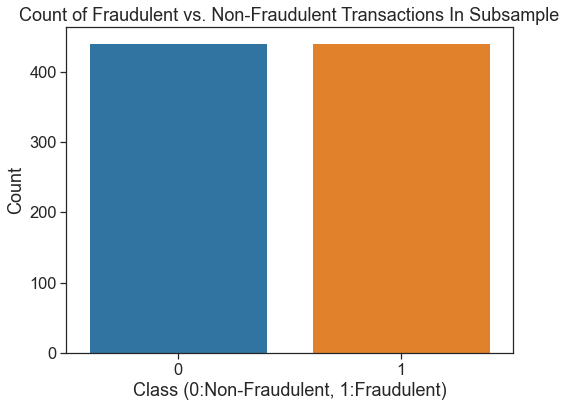

In [71]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [72]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-4.35e-01
V2,4.81e-01
V3,-5.63e-01
V4,7.07e-01
V5,-3.75e-01
V6,-4.00e-01
V7,-4.75e-01
V8,5.53e-02
V9,-5.53e-01
V10,-6.26e-01


In [73]:

#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

,Class
V3,-0.56
V9,-0.55
V10,-0.63
V12,-0.69
V14,-0.75
V16,-0.60
V17,-0.56


In [74]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

,Class
V4,0.71
V11,0.68
Class,1.00


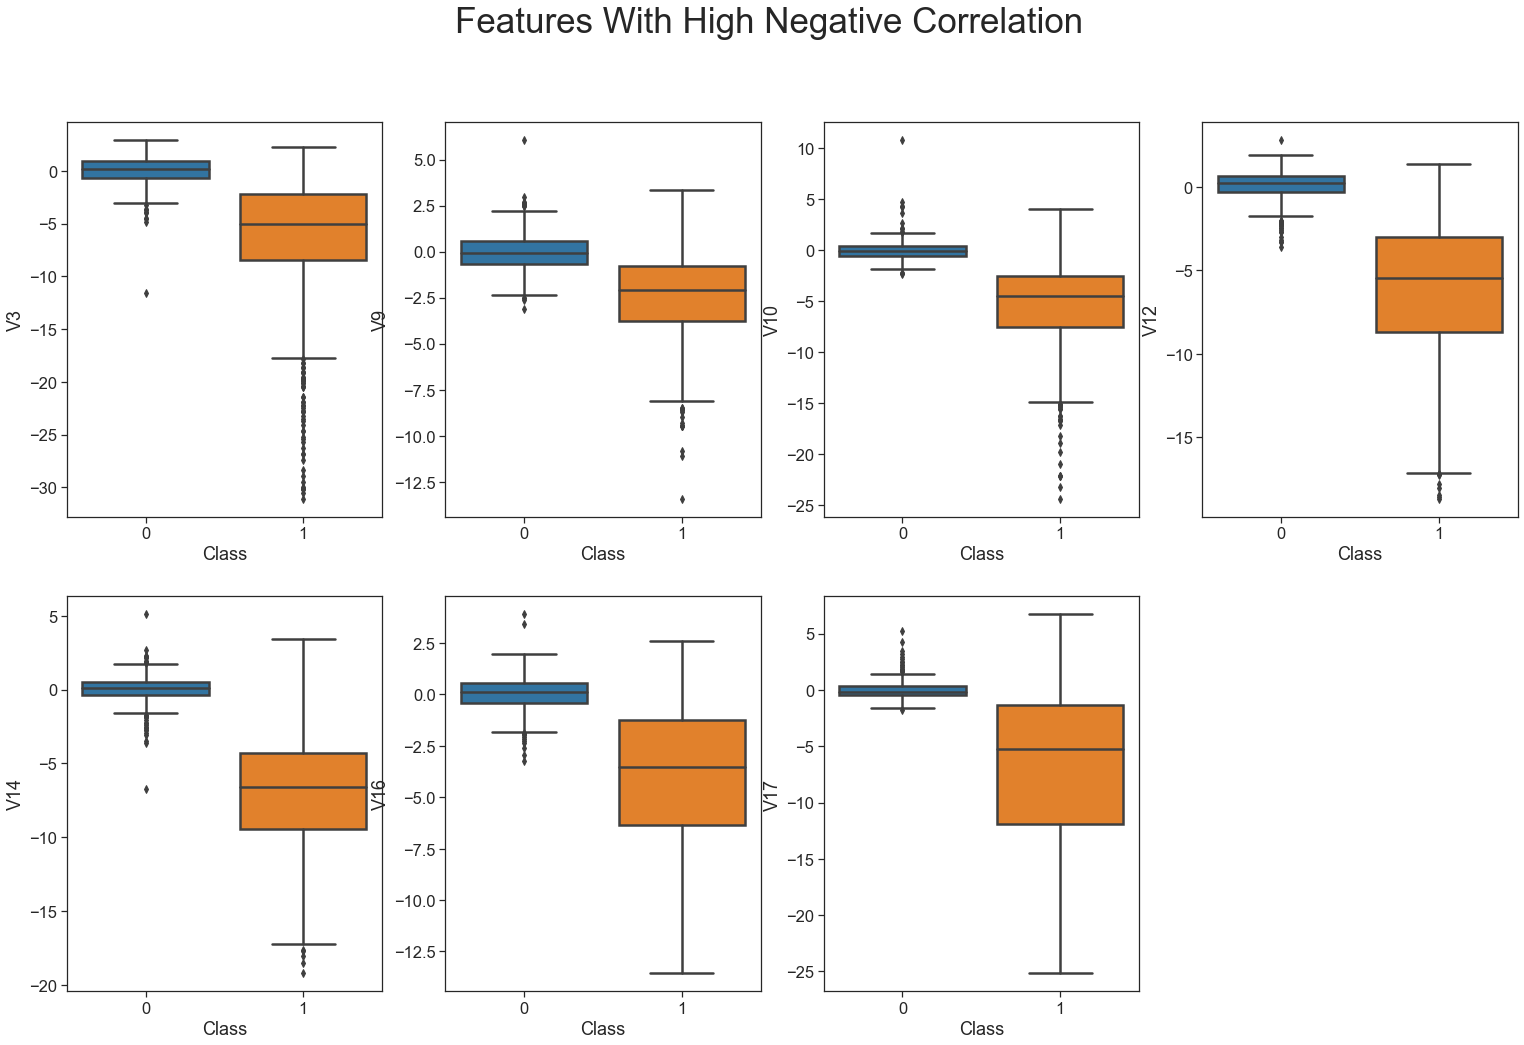

In [75]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

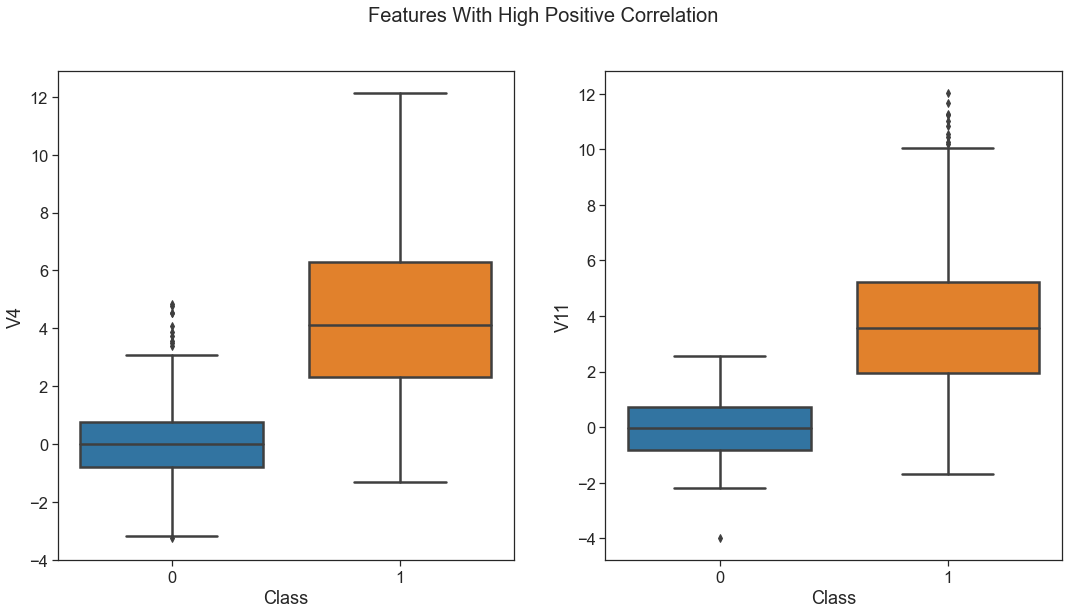

In [76]:

#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

# Removing Outliers

In [77]:

#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

# Reduce Dimensionality

In [78]:
from sklearn.manifold import TSNE
X = df2.drop('Class', axis=1)
y = df2['Class']

#t-SNE
X_sm_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

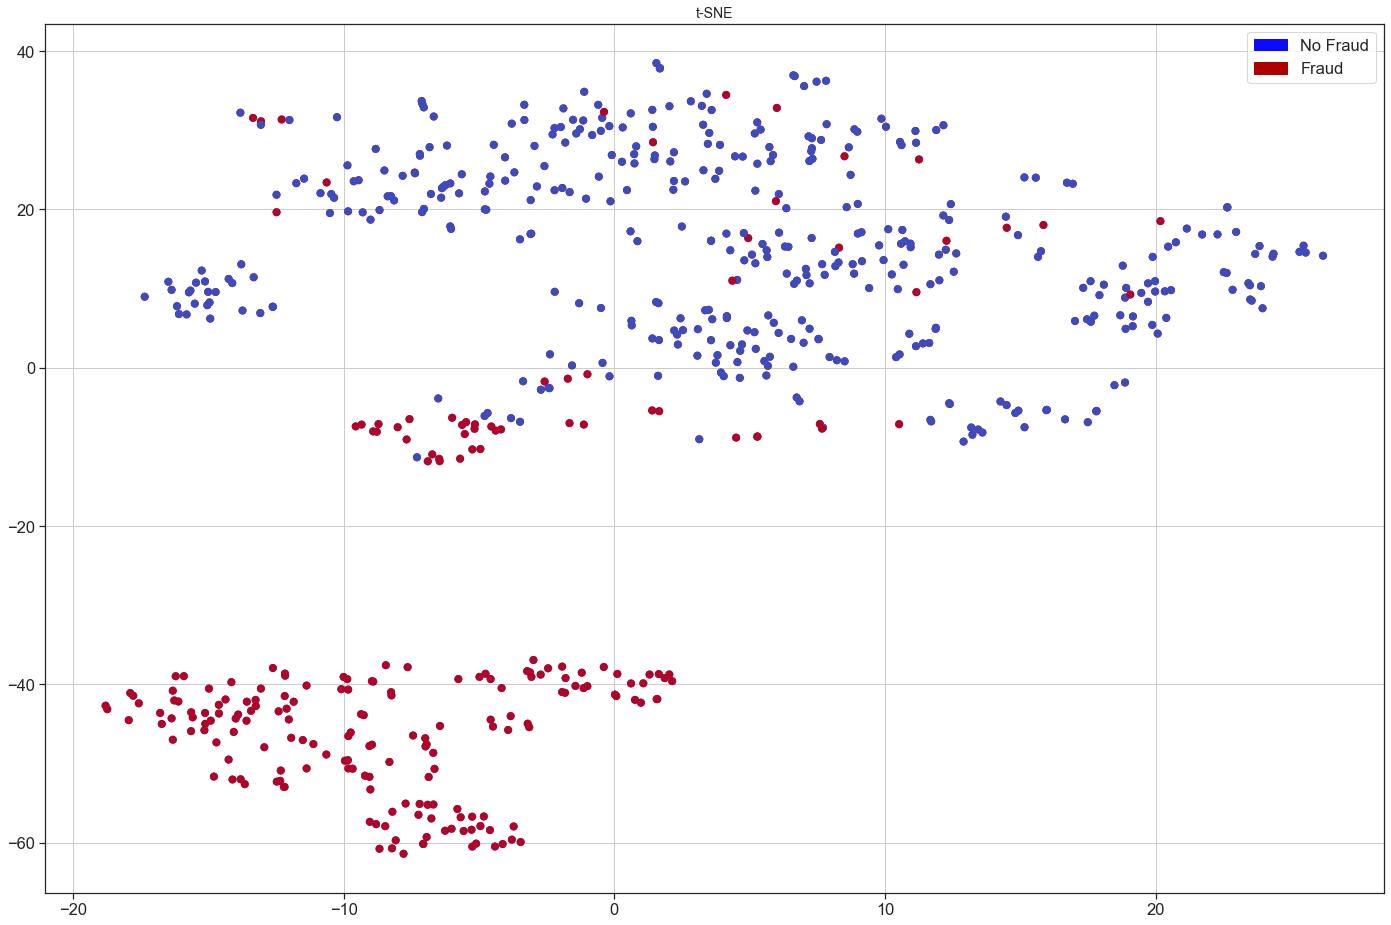

In [79]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_sm_tsne[:,0], X_sm_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_sm_tsne[:,0], X_sm_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


# Testing Different Classification Algorithms

In [81]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:

##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.978133 (0.018129)
LDA: 0.980824 (0.011851)
KNN: 0.961821 (0.024905)
CART: 0.876591 (0.038696)
SVM: 0.974619 (0.019331)
XGB: 0.973825 (0.019604)
RF: 0.973361 (0.024801)


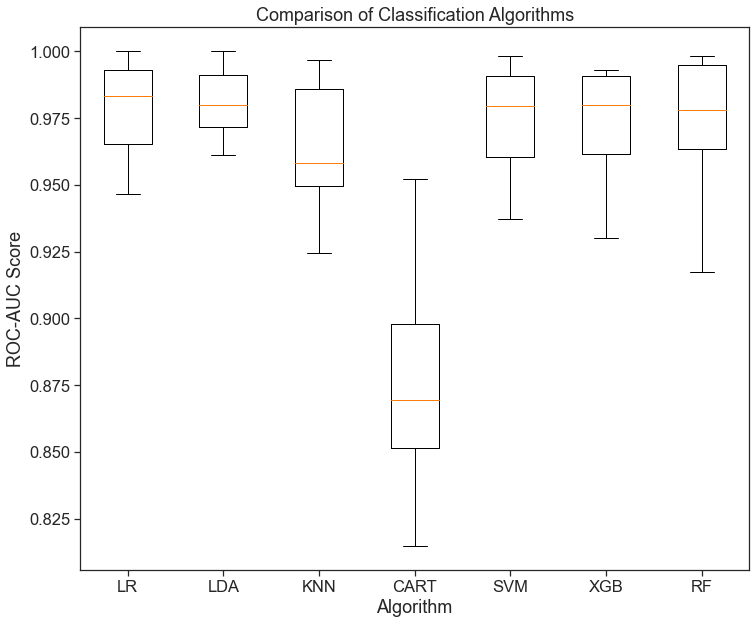

In [88]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()